# Regresión Polinómica

In [1]:
# Se cargan las librerías que se van a utilizar en ambos ejemplos
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
## 1) EXTRAER DATOS
df = pd.read_csv('WeatherData.csv')
print(df.shape)

(25, 2)


In [3]:
## 2) ANÁLISIS EXPLORATORIO
df.head()

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


Los datos corresponden a la información de 25 mediciones de temperatura y humedad.

La información que se tiene es:

   - **Pressure (millibars):** Presión medida en milibares.
   - **Humidity:** Humedad.
   
Milibares: Unidades en el sistema métrico de presión del aire [(ver definición)](https://www.britannica.com/science/millibar). 

Se desea ajustar un modelo de regresión polinómica a los datos para predecir la humedad con base en la presión.

In [4]:
# Se cuenta el número de NaN's por columna
df.isnull().sum()

Pressure (millibars)    0
Humidity                0
dtype: int64

In [5]:
# Se definen las varibles X (predictoras) y Y (dependiente)
Y = df.Humidity
X = df[['Pressure (millibars)']]

In [6]:
df.describe()

,Pressure (millibars),Humidity
count,25.000000,25.0000
mean,1011.481600,0.5932
std,2.873799,0.1590
min,1007.260000,0.3600
25%,1008.360000,0.4600
50%,1012.220000,0.5900
75%,1014.240000,0.7200
max,1014.520000,0.8500


C:\Users\miri_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frecuencia relativa')

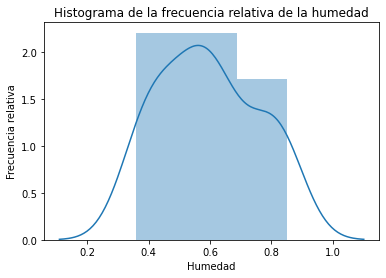

In [7]:
## 3) VISUALIZACIÓN DE LOS DATOS

#Histograma de la frecuencia relativa de la humedad con la densidad ajustada correspondiente.
sns.distplot(Y)
plt.title('Histograma de la frecuencia relativa de la humedad')
plt.xlabel('Humedad')
plt.ylabel('Frecuencia relativa')

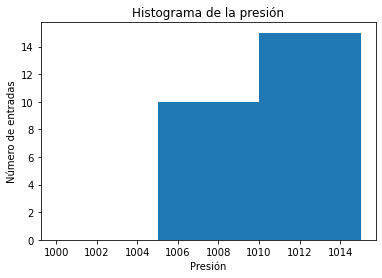

In [8]:
plt.hist(X, bins=[1000,1005,1010,1015])
plt.title('Histograma de la presión')
plt.xlabel('Presión')
plt.ylabel('Número de entradas')
plt.show()

Pressure (millibars)    1011.48
dtype: float64


<AxesSubplot:xlabel='Pressure (millibars)'>

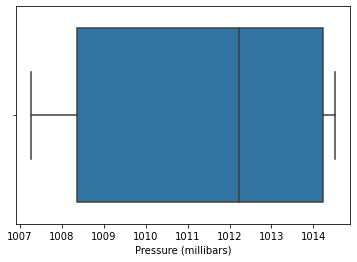

In [9]:
print(round(np.mean(X),2))
sns.boxplot(x="Pressure (millibars)", data=df)

0.59


<AxesSubplot:xlabel='Humidity'>

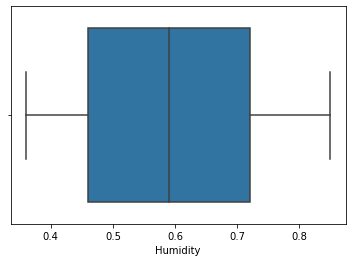

In [10]:
print(round(np.mean(Y),2))
sns.boxplot(x="Humidity", data=df)

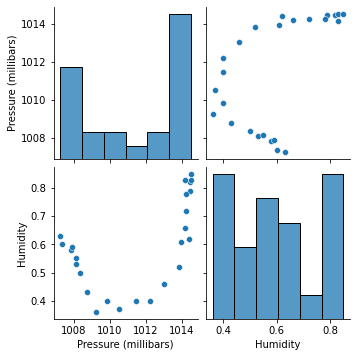

In [11]:
#Se muestra la correlación entre las variables
sns.pairplot(df)

In [12]:
## 4) DIVIDIR LOS DATOS
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.4, random_state = 42)

## Polinomio de grado 2

In [13]:
## 5) CONSTRUIR UN MODELO
# En este ejemplo vamos a elegir un modelo de regresión polinómica para "X_train"
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_train,Y_train)

PolynomialFeatures()

In [14]:
print(X_train.shape)
print(X_poly.shape)

(15, 1)
(15, 3)


In [15]:
model = LinearRegression() 
model.fit(X_poly,Y_train) 

LinearRegression()

In [16]:
## 6) PREDICCIONES
Y_pred = model.predict(poly.fit_transform(X_test))
Y_pred

array([0.75558482, 0.40079103, 0.78907661, 0.65327848, 0.53413825,
       0.69461183, 0.37442736, 0.74471696, 0.56135046, 0.8168293 ])

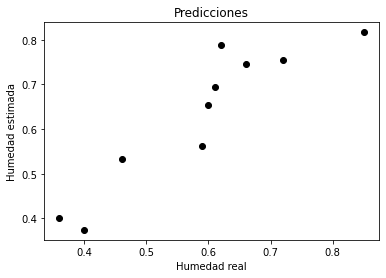

In [17]:
# Se grafican los resultados de la predicción.
plt.scatter(Y_test, Y_pred, color = 'black')
plt.title('Predicciones')
plt.xlabel('Humedad real')
plt.ylabel('Humedad estimada')
plt.show()

#### 7) EVALUACIÓN DEL MODELO
Veamos cómo se comporta el modelo:

7.1 Calcular $R^{2}$ ajustada $ = 1 - \dfrac{(1 - R^{2}) (n-1)}{n - p - 1}$, donde

$R^{2}:$ R cuadrada de los datos

$n:$ Número de datos para entrenar al modelo

$p:$ Número de variables independientes

7.2 Calcular los errores absolutos $(real - estimado)$ y graficarlos

7.3 Calcular los errores relativos $\left( \dfrac{\text{real - estimado}}{\text{real}} \right)$ y graficarlos

7.4 Graficar valores estimados vs valores reales

7.5 Calcular el error cuadrático: $(real − estimado)^{2}$

7.6 Calcular el error cuadrático medio: $\dfrac{\displaystyle \sum_{i = 1}^{n} (real_{i} − estimado_{i})^{2}}{n}$



In [18]:
#7.1 Calcular R^2 ajustada
r_cuad2 = r2_score(Y_test,Y_pred)
print('R^2 = ',round(r_cuad2,3)) #Porcentaje de los datos explicados por el modelo

#R^2 ajustada
n = len(Y_train)
p = X_train.shape[1]
r_cuad_aj2 = 1 - (((1-r_cuad2)*(n-1))/(n-p-1))

print('n = ',n)
print('p = ',p)
print('R^2_aj = ',round(r_cuad_aj2,3))

R^2 =  0.711
n =  15
p =  1
R^2_aj =  0.689


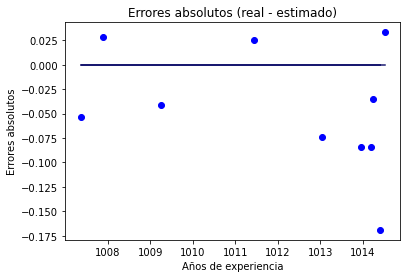

In [19]:
#7.2 Calcular los errores absolutos (real - estimado) y graficarlos
err_abs = Y_test-Y_pred

plt.scatter(X_test, err_abs, color = 'blue')
plt.plot(X_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores absolutos (real - estimado)')
plt.xlabel('Años de experiencia')
plt.ylabel('Errores absolutos')
plt.show()

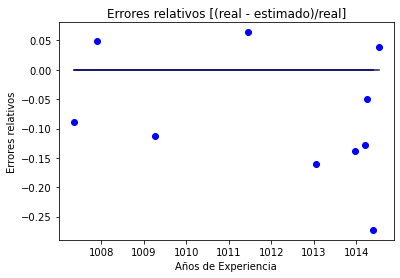

In [20]:
#7.3 Calcular los errores relativos [(real - estimado)/real] y graficarlos
err_rel = err_abs/Y_test

plt.scatter(X_test, err_rel, color = 'blue')
plt.plot(X_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores relativos [(real - estimado)/real]')
plt.xlabel('Años de Experiencia')
plt.ylabel('Errores relativos')
plt.show()

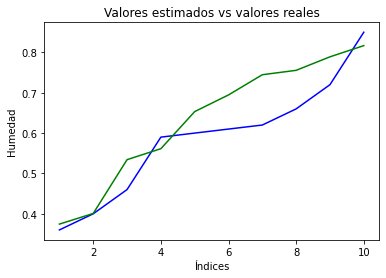

In [21]:
#7.4 Graficar valores estimados vs valores reales
#Los ordenamos de menor a mayor
eje_X = range(1,len(Y_test)+1)
plt.plot(eje_X, sorted(Y_test), color = 'blue') #Recta de valores reales
plt.plot(eje_X, sorted(Y_pred), color = 'green') #Recta de valores estimados
plt.title('Valores estimados vs valores reales')
plt.xlabel('Índices')
plt.ylabel('Humedad')
plt.show()

In [22]:
#7.5 Calcular el error cuadrático = (real − estimado)^2
err_cuad = pow(err_abs,2)

#7.6 Calcular el error cuadrático medio = (1/n) * \sum (real − estimado)^2
'''
Indica qué tan cerca está la línea de la regresión lineal de los valores estimados.
i) Se elevan al cuadrado los errores absolutos.
ii) Se suman.
iii) Se divide el resultado entre el número de datos estimados.
'''
ECM2 = mean_squared_error(Y_test, Y_pred)
print(round(ECM2,2))

0.01


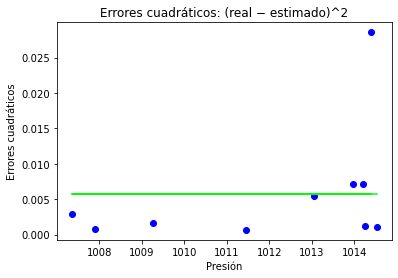

In [23]:
#Graficamos los errores cuadráticos
Y= np.repeat(ECM2, len(err_cuad))
plt.scatter(X_test, err_cuad, color = 'blue')#Se ordenan de menor a mayor
plt.plot(X_test,Y , color = 'lime') #Recta en Y = ECM
plt.title('Errores cuadráticos: (real − estimado)^2')
plt.xlabel('Presión')
plt.ylabel('Errores cuadráticos')
plt.show()

In [24]:
# Se define la función para graficar las curvas de aprendizaje
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)    

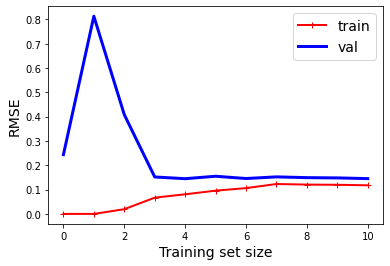

In [25]:
plot_learning_curves(model, X_train,Y_train)

## Polinomio de grado 3

In [26]:
## 5) CONSTRUIR UN MODELO
# En este ejemplo vamos a elegir un modelo de regresión polinómica para "X_train"
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X_train)
poly3.fit(X_train,Y_train)

print(X_train.shape)
print(X_poly3.shape)

model3 = LinearRegression() 
model3.fit(X_poly3,Y_train) 

(15, 1)
(15, 4)


LinearRegression()

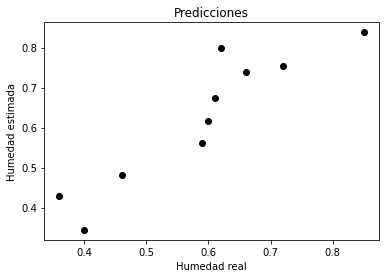

In [27]:
## 6) PREDICCIONES
Y_pred = model3.predict(poly3.fit_transform(X_test))

# Se grafican los resultados de la predicción.
plt.scatter(Y_test, Y_pred, color = 'black')
plt.title('Predicciones')
plt.xlabel('Humedad real')
plt.ylabel('Humedad estimada')
plt.show()

R^2 =  0.728
n =  15
p =  1
R^2_aj =  0.707


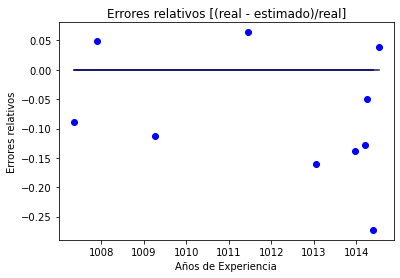

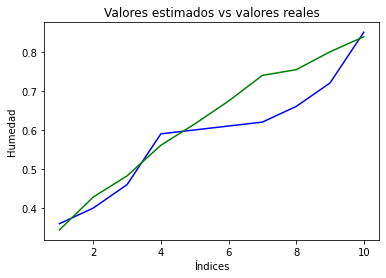

0.01


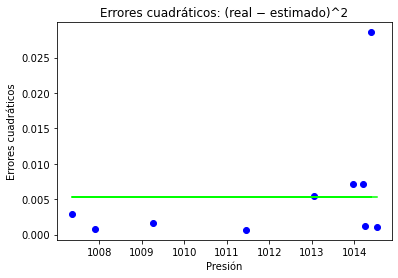

In [28]:
## 7) Evaluación del modelo
#7.1 Calcular R^2 ajustada
r_cuad3 = round(r2_score(Y_test,Y_pred),3)
print("R^2 = ", r_cuad3)

#R^2 ajustada
n = len(Y_train)
p = X_train.shape[1]
r_cuad_aj3 = 1 - (((1-r_cuad3)*(n-1))/(n-p-1))

print('n = ',n)
print('p = ',p)
print('R^2_aj = ',round(r_cuad_aj3,3))

#7.2 Calcular los errores relativos [(real - estimado)/real] y graficarlos
err_rel = err_abs/Y_test
plt.scatter(X_test, err_rel, color = 'blue')
plt.plot(X_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores relativos [(real - estimado)/real]')
plt.xlabel('Años de Experiencia')
plt.ylabel('Errores relativos')
plt.show()


#7.3 Graficar valores estimados vs valores reales
#Los ordenamos de menor a mayor
eje_X = range(1,len(Y_test)+1)
plt.plot(eje_X, sorted(Y_test), color = 'blue') #Recta de valores reales
plt.plot(eje_X, sorted(Y_pred), color = 'green') #Recta de valores estimados
plt.title('Valores estimados vs valores reales')
plt.xlabel('Índices')
plt.ylabel('Humedad')
plt.show()


#7.5 Calcular el error cuadrático = (real − estimado)^2
err_cuad = pow(err_abs,2)

#7.6 Calcular el error cuadrático medio = (1/n) * \sum (real − estimado)^2
'''
Indica qué tan cerca está la línea de la regresión lineal de los valores estimados.
i) Se elevan al cuadrado los errores absolutos.
ii) Se suman.
iii) Se divide el resultado entre el número de datos estimados.
'''
ECM3 = mean_squared_error(Y_test, Y_pred)
print(round(ECM3,2))


#Graficamos los errores cuadráticos
Y_ECM= np.repeat(ECM3, len(err_cuad))
plt.scatter(X_test, err_cuad, color = 'blue')#Se ordenan de menor a mayor
plt.plot(X_test,Y_ECM, color = 'lime') #Recta en Y = ECM
plt.title('Errores cuadráticos: (real − estimado)^2')
plt.xlabel('Presión')
plt.ylabel('Errores cuadráticos')
plt.show()

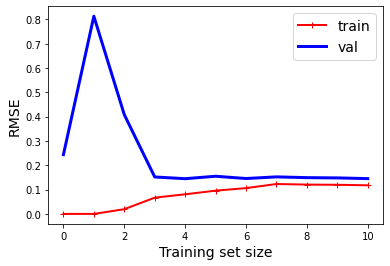

In [29]:
#Curvas de aprendizaje
plot_learning_curves(model3, X_train,Y_train)

## Polinomio de grado 4

In [30]:
## 5) CONSTRUIR UN MODELO
# En este ejemplo vamos a elegir un modelo de regresión polinómica para "X_train"
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X_train)
poly4.fit(X_train,Y_train)

print(X_train.shape)
print(X_poly4.shape)

model4 = LinearRegression() 
model4.fit(X_poly4,Y_train) 

(15, 1)
(15, 5)


LinearRegression()

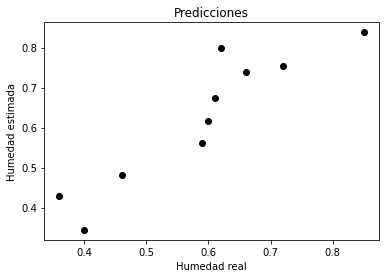

In [31]:
## 6) PREDICCIONES
Y_pred = model4.predict(poly4.fit_transform(X_test))

# Se grafican los resultados de la predicción.
plt.scatter(Y_test, Y_pred, color = 'black')
plt.title('Predicciones')
plt.xlabel('Humedad real')
plt.ylabel('Humedad estimada')
plt.show()

R^2 =  0.728
n =  15
p =  1
R^2_aj =  0.707


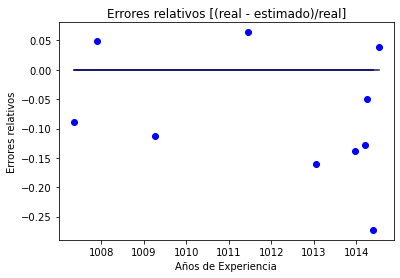

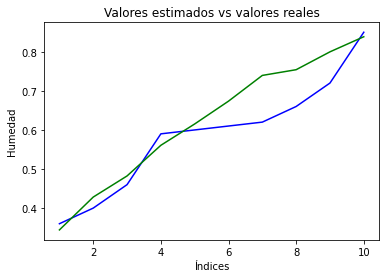

0.01


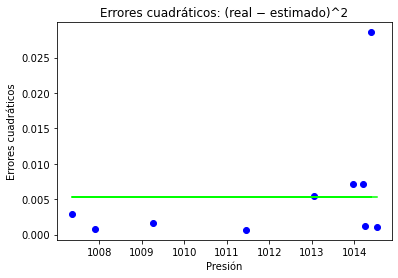

In [32]:
## 7) Evaluación del modelo
#7.1 Calcular R^2 ajustada
r_cuad4 = round(r2_score(Y_test,Y_pred),3)
print("R^2 = ", r_cuad4)

#R^2 ajustada
n = len(Y_train)
p = X_train.shape[1]
r_cuad_aj4 = 1 - (((1-r_cuad4)*(n-1))/(n-p-1))

print('n = ',n)
print('p = ',p)
print('R^2_aj = ',round(r_cuad_aj4,3))



#7.2 Calcular los errores relativos [(real - estimado)/real] y graficarlos
err_rel = err_abs/Y_test
plt.scatter(X_test, err_rel, color = 'blue')
plt.plot(X_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores relativos [(real - estimado)/real]')
plt.xlabel('Años de Experiencia')
plt.ylabel('Errores relativos')
plt.show()


#7.3 Graficar valores estimados vs valores reales
#Los ordenamos de menor a mayor
eje_X = range(1,len(Y_test)+1)
plt.plot(eje_X, sorted(Y_test), color = 'blue') #Recta de valores reales
plt.plot(eje_X, sorted(Y_pred), color = 'green') #Recta de valores estimados
plt.title('Valores estimados vs valores reales')
plt.xlabel('Índices')
plt.ylabel('Humedad')
plt.show()


#7.4 Calcular el error cuadrático = (real − estimado)^2 y el error cuadrático medio = (1/n) * \sum (real − estimado)^2
err_cuad = pow(err_abs,2)
ECM4 = mean_squared_error(Y_test, Y_pred)
print(round(ECM4,2))

#Graficamos los errores cuadráticos
Y_ECM= np.repeat(ECM4, len(err_cuad))
plt.scatter(X_test, err_cuad, color = 'blue')#Se ordenan de menor a mayor
plt.plot(X_test,Y_ECM , color = 'lime') #Recta en Y = ECM
plt.title('Errores cuadráticos: (real − estimado)^2')
plt.xlabel('Presión')
plt.ylabel('Errores cuadráticos')
plt.show()

(0.0, 1.0)

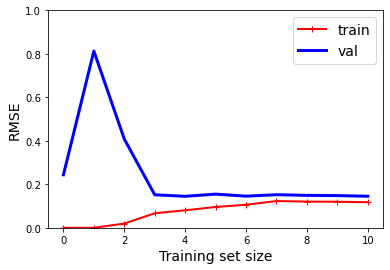

In [33]:
#Curvas de aprendizaje
plot_learning_curves(model, X_train,Y_train)
plt.ylim([0, 1])

(0.0, 1.0)

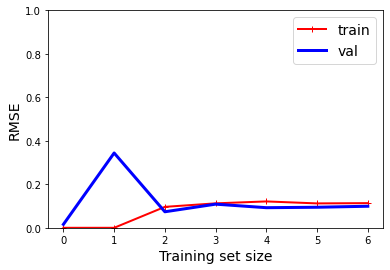

In [34]:
#Curvas de aprendizaje
plot_learning_curves(model, X_test,Y_test)
plt.ylim([0, 1])

(0.0, 1.0)

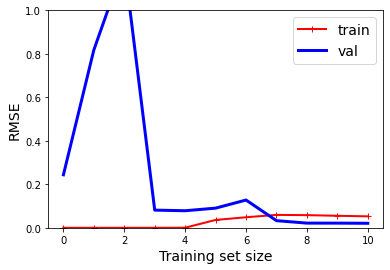

In [35]:
#Curvas de aprendizaje
plot_learning_curves(model4, X_poly4,Y_train)
plt.ylim([0, 1])

# Conclusiones



In [36]:
print("Grado 2:")
print("R^2 ajustada = ",round(r_cuad_aj2,3),"  ECM = ",round(ECM2,3))

print("\nGrado 3:")
print("R^2 ajustada = ",round(r_cuad_aj3,3),"  ECM = ",round(ECM3,3))

print("\nGrado 4:")
print("R^2 ajustada = ",round(r_cuad_aj4,3),"  ECM = ",round(ECM4,3))

Grado 2:
R^2 ajustada =  0.689   ECM =  0.006

Grado 3:
R^2 ajustada =  0.707   ECM =  0.005

Grado 4:
R^2 ajustada =  0.707   ECM =  0.005


Si elegimos como criterios de elección del mejor modelo $R^2$ ajustada o el error cuadrático medio, concluimos que el mejor modelo para estos datos es el modelo con el polinomio de grado 3.

### ¿Por qué no se elige el de grado 4 si tiene los mismos resultados?

Porque en caso de "empate" en los criterios de elección del mejor modelo, se prefiere el modelo más sencillo. Por ser más fácil de interpretar y usualmente más rápido en cuanto al tiempo de máquina.

### ¿Qué pasa si tomamos todos los datos?

In [37]:
# Se definen las varibles X (predictoras) y Y (dependiente)
Y = df.Humidity
X = df[['Pressure (millibars)']]

#Definimos el modelo con un polinomio de grado 3
mod3 = PolynomialFeatures(degree=3)
X_poly = mod3.fit_transform(X)
mod3.fit(X,Y)

print(X.shape)
print(X_poly.shape)
lin_mod = LinearRegression()
lin_mod.fit(X_poly,Y)

(25, 1)
(25, 4)


LinearRegression()

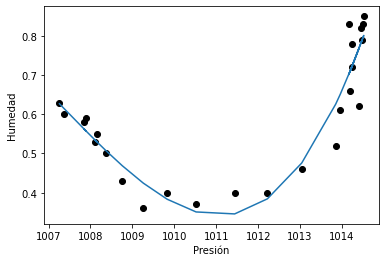

In [38]:
#Predecir y graficar
Y_pred = lin_mod.predict(X_poly)

plt.scatter(X, Y, c = "black")
plt.xlabel("Presión")
plt.ylabel("Humedad")
plt.plot(X, Y_pred)

In [39]:
#Nuevas predicciones
y1 = lin_mod.predict(mod3.fit_transform([[1005]]))
print(y1)

y2 = lin_mod.predict(mod3.fit_transform([[1010]]))
print(y2)

y3 = lin_mod.predict(mod3.fit_transform([[1015]]))
print(y3)


[0.84005539]
[0.37340459]
[0.95788146]


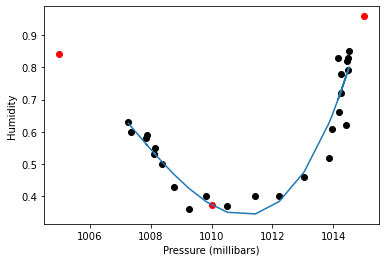

In [40]:
x_new = [1005,1010,1015]
Y_test = [y1,y2,y3]
plt.scatter(X, Y, c = "black")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.plot(X, Y_pred)
plt.scatter(x_new, Y_test, c = "red")

Debido a que utilizamos todos los datos, al momento de predecir, tomamos nuevos valores (puntos rojos).

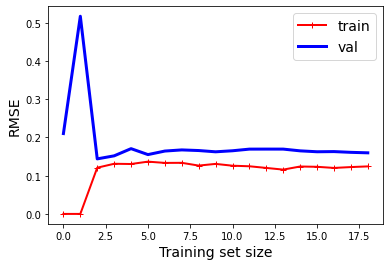

In [41]:
#Curvas de aprendizaje
plot_learning_curves(model, X,Y)

In [42]:
print("R^2 = ",round(r2_score(Y,Y_pred),3),"  ECM = ",round(mean_squared_error(Y, Y_pred),3))

R^2 =  0.878   ECM =  0.003
